In [12]:
import numpy as np
import matplotlib.pyplot as plt

# this sets up the Matplotlib interactive windows:
%matplotlib widget

# this changes the default date converter for better interactive plotting of dates:
plt.rcParams['date.converter'] = 'concise'

ModuleNotFoundError: No module named 'ipympl'

In [13]:
#   Note the use of datetimes in the file complicate loading a bit.
#   We recommend using pandas or xarray for more elegant solutions
#   to handling complex timeseries data. 
with open('data/small.txt', 'r') as f:
    data = np.genfromtxt(f, dtype='datetime64[s],f,f,f', 
                         names=['date', 'doy', 'temp', 'solar'])
datetime = data['date']
dayofyear = data['doy']
temperature = data['temp']
solar = data['solar']

# make two-day smoothed versions:
temp_low = np.convolve(temperature, np.ones(48)/48, mode='same')
solar_low = np.convolve(solar, np.ones(48)/48, mode='same')

FileNotFoundError: [Errno 2] No such file or directory: 'data/small.txt'

NameError: name 'datetime' is not defined

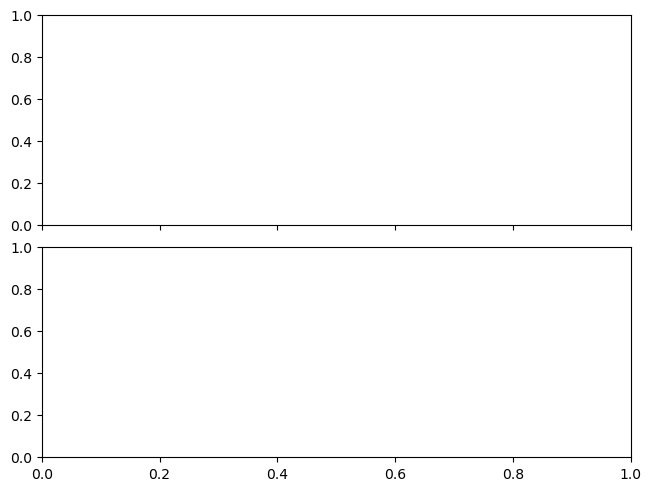

In [14]:
fig, (ax0, ax1) = plt.subplots(2, 1, sharex=True, constrained_layout=True)

# temperature:
ax0.plot(datetime, temperature, label='hourly')
ax0.plot(datetime, temp_low, label='smoothed')
ax0.legend(loc='upper right')
ax0.set_ylabel('Temperature $[^oC]$')  # note the use of TeX math formatting

# solar-radiation:
ax1.plot(datetime, solar, label='hourly')
ax1.plot(datetime, solar_low, label='smoothed')
ax1.legend(loc='upper right')
ax1.set_ylabel('Solar radiation $[W\,m^{-2}]$')   # note the use of TeX math formatting

ax0.set_title('Observations: Dinosaur, Colorado', loc='left')
ax0.text(0.03, 0.03, 'https://www.ncei.noaa.gov/pub/data/uscrn/products/hourly02/', 
         fontsize='small', fontstyle='italic', transform=ax0.transAxes);

<h1> Dataframe

python-data-science-handbook-jupyter-notebook-version-9781491912058_compress.pdf

In [16]:
df = pd.DataFrame([pool1=1,2,3,4]) #passing a series
df # show
# two series
index = 'WWI WWII'.split()
new_df = pd.DataFrame([pool1=1,2,3,4,pool3=5,3,2,1],index)
new_df # show

SyntaxError: invalid syntax. Maybe you meant '==' or ':=' instead of '='? (4194776865.py, line 1)

<h1> Pandas

In [11]:
import numpy as np
import pandas as pd

In [10]:
data = pd.Series([123, 45, 56, 80])
data

0    123
1     45
2     56
3     80
dtype: int64

In [12]:
data.values

array([123,  45,  56,  80])

In [13]:
data[1]

45

In [27]:
candidates = pd.Series([4, 3, 5, 6])
candidates

0    4
1    3
2    5
3    6
dtype: int64

In [21]:
candidates[2]

5

In [22]:
data[2]

5

In [41]:
score = pd.Series([90, 95, 96, 98], index=[1, 2, 3, 4])
score

1    90
2    95
3    96
4    98
dtype: int64

In [48]:
score.index

Int64Index([1, 2, 3, 4], dtype='int64')

In [51]:
score[1:3]

2    95
3    96
dtype: int64

In [53]:
maths = pd.Series([94, 90, 98, 96], index=['San', 'Sak', 'Sam', 'Sok'])
maths

San    94
Sak    90
Sam    98
Sok    96
dtype: int64

Maths score of the top students in 10I2

In [64]:
max(maths), min(maths)

(98, 90)

In [33]:
sales_dict = {'Berlin': 65, 'London': 60, 'Rome': 55, 'Albany': 80}
sales = pd.Series(sales_dict)
sales

Berlin    65
London    60
Rome      55
Albany    80
dtype: int64

Note: Sales are measured in millions (USD)

In [34]:
targets_dict = {'San Pan': 12000, 'Steve Porsche': 78000, 'Chun Fang Hui': 34000, 'Ben Roger': 87000}
targets = pd.Series(targets_dict)
targets

San Pan          12000
Steve Porsche    78000
Chun Fang Hui    34000
Ben Roger        87000
dtype: int64

Note: Wealth are measured in millions (USD)

In [35]:
sales['Berlin':'Rome']

Berlin    65
London    60
Rome      55
dtype: int64

In [76]:
pd.Series([3, 6, 9])

0    3
1    6
2    9
dtype: int64

In [88]:
df1 = pd.Series([2, 3, 4, 1], index=list('abcd'))
df1

a    2
b    3
c    4
d    1
dtype: int64

In [80]:
# shell command to download the data
# !curl -O https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv

In [ ]:
births = pd.read_csv('data/births.csv')

In [83]:
births.heads()

NameError: name 'births' is not defined

In [90]:
pc = pd.Series([1, np.nan, 2, None, 3], index=list('abcde'))
pc

a    1.0
b    NaN
c    2.0
d    NaN
e    3.0
dtype: float64

In [91]:
pc.fillna(0)

a    1.0
b    0.0
c    2.0
d    0.0
e    3.0
dtype: float64

In [92]:
# forward-fill
pc.fillna(method='ffill')

a    1.0
b    1.0
c    2.0
d    2.0
e    3.0
dtype: float64

In [93]:
# backward-fill
pc.fillna(method='bfill')

a    1.0
b    2.0
c    2.0
d    3.0
e    3.0
dtype: float64

In [123]:
df = pd.DataFrame([[95, np.nan, 92], [98, 96, 97], [np.nan, 98, 96]], index=['San', 'Sak', 'Sok'])
df

,0,1,2
San,95.0,NaN,92
Sak,98.0,96.0,97
Sok,NaN,98.0,96


In [98]:
df.dropna()

,0,1,2
1,2.0,3.0,5


In [99]:
df.dropna(axis='columns')

,2
0,2
1,5
2,6


In [140]:
info = {'Maths':[95, 98, np.nan], 'English':[np.nan, 96, 98], 'IT':[92, 97, 96], 'Physics': [97, 97, 98]}
exam = pd.DataFrame(info, index=['San', 'Sak', 'Sok'])
exam

,Maths,English,IT,Physics
San,95.0,NaN,92,97
Sak,98.0,96.0,97,97
Sok,NaN,98.0,96,98


In [118]:
exam.dropna()

,Maths,English,IT,Physics
Sak,98.0,96.0,97,97


In [119]:
exam.dropna(axis='columns')

,IT,Physics
San,92,97
Sak,97,97
Sok,96,98


In [172]:
exam_dict = {'San':[95, np.nan, 92, 97], 'Sak':[98, 96, 97, 97], 'Sok':[np.nan, 98, 96, 98]}
exam = pd.DataFrame(exam_dict, index=['Maths', 'English', 'IT', 'Physics'])
exam

,San,Sak,Sok
Maths,95.0,98,NaN
English,NaN,96,98.0
IT,92.0,97,96.0
Physics,97.0,97,98.0


In [151]:
exam.dropna(axis='columns')

,Sak
Maths,98
English,96
IT,97
Physics,97


In [152]:
exam.dropna()

,San,Sak,Sok
IT,92.0,97,96.0
Physics,97.0,97,98.0


In [153]:
# back-fill
exam.fillna(method='bfill')

,San,Sak,Sok
Maths,95.0,98,98.0
English,92.0,96,98.0
IT,92.0,97,96.0
Physics,97.0,97,98.0


<h2> Hierarchical Indexing

Page 98

In [211]:
index = [('Phnom Penh', 2020), ('Phnom Penh', 2021), ('Beijing', 2020), ('Beijing', 2021), 
         ('London', 2020), ('London', 2021), ('Boston', 2020), ('Boston', 2021)]
sales = [67, 75, 180, 220, 110, 150, 130, 180]
sales = pd.DataFrame(sales, index=index)
sales

,0
"(Phnom Penh, 2020)",67
"(Phnom Penh, 2021)",75
"(Beijing, 2020)",180
"(Beijing, 2021)",220
"(London, 2020)",110
"(London, 2021)",150
"(Boston, 2020)",130
"(Boston, 2021)",180


In [169]:
sales = {2020:[67, 180, 110, 130], 2021:[75, 220, 150, 180]}
index = ['Phnom Penh', 'Beijing', 'London', 'New York']
sales = pd.DataFrame(sales, index=index)
sales

,2020,2021
Phnom Penh,67,75
Beijing,180,220
London,110,150
New York,130,180


In [180]:
company = [('A', 2020), ('A', 2021), ('B', 2020), ('B', 2021), ('C', 2020), ('C', 2021)]
sales = [10, 30, 45, 33, 20, 32]
sales = pd.DataFrame(sales, index=company)
sales

,0
"(A, 2020)",10
"(A, 2021)",30
"(B, 2020)",45
"(B, 2021)",33
"(C, 2020)",20
"(C, 2021)",32


In [185]:
sales = {2020:[10, 45, 20], 2021:[30, 33, 32]}
companies = ['Shell', 'Exxon', 'Chevron']
data = pd.DataFrame(sales, index=companies)
data

,2020,2021
Shell,10,30
Exxon,45,33
Chevron,20,32


In [191]:
candidates = ['Sak', 'Mony', 'Pheak', 'Cheata']
record = {'GPA':[3.78, 3.83, 3.85, 3.77], 'Sex':['M', 'F', 'M', 'F'], 
          'University':['RUPP', 'Nanhua', 'Norton', 'CCNY']}
data = pd.DataFrame(record, index=candidates)
data

,GPA,Sex,University
Sak,3.78,M,RUPP
Mony,3.83,F,Nanhua
Pheak,3.85,M,Norton
Cheata,3.77,F,CCNY


In [198]:
data = pd.DataFrame({'Score':[2, 4, 6]}, index=list('abc'))
data

,Score
a,2
b,4
c,6


In [201]:
students = {'Name':['Sak', 'Mony', 'Pheak', 'Cheata'], 'GPA':[3.78, 3.83, 3.85, 3.77], 'Sex':['M', 'F', 'M', 'F'], 
          'University':['RUPP', 'Nanhua', 'Norton', 'CCNY']}
students = pd.DataFrame(students, index=list('1234'))
students

,Name,GPA,Sex,University
1,Sak,3.78,M,RUPP
2,Mony,3.83,F,Nanhua
3,Pheak,3.85,M,Norton
4,Cheata,3.77,F,CCNY


In [223]:
max(students.GPA)

3.85

In [214]:
students = {'Name':['Sak', 'Mony', 'Pheak', 'Cheata'], 'GPA':[3.78, 3.83, 3.85, 3.77], 'Sex':['M', 'F', 'M', 'F'], 
          'University':['RUPP', 'Nanhua', 'Norton', 'CCNY']}
students = pd.Series(students)
students

Name            [Sak, Mony, Pheak, Cheata]
GPA               [3.78, 3.83, 3.85, 3.77]
Sex                           [M, F, M, F]
University    [RUPP, Nanhua, Norton, CCNY]
dtype: object

In [212]:
students = {'Sak': 3.78, 'Mony': 3.83, 'Pheak': 3.85, 'Cheata': 3.77}
students = pd.Series(students)
students

Sak       3.78
Mony      3.83
Pheak     3.85
Cheata    3.77
dtype: float64

In [230]:
score = {'Sak': 96, 'Mony': 95, 'Pheak': 98, 'Cheata': 97}
score = pd.DataFrame(score, index=['Maths'])
score

,Sak,Mony,Pheak,Cheata
Maths,96,95,98,97


- DataFrame can't read or decide what's x(index) or y(series); though, we use dictionary to contain and group x:y's seperated by commas(,) unless we seperate what the series and index are.

- If the values exist as 'x':y then pd.Series can digest the difference between what is x and y by two Series; one for x and y. The pd.Series always result into two Series/columns regardless how many values there are y's/Series hold.

- For example if the value appears as 'x':[1,2,3,4], then pd.Series will have only two columns/series as usual with the first series containing x and the second one with [1,2,3,4].

- This is different from pd.DataFrame as pd.DataFrame can only produce visualizations when we only divide what index contains and what series encloses(in a dictionary) will take the whole 'x':[1,2,3,4] as series or y (y= 'x':[1,2,3,4]) and generates its own index starting with the number 0 to give us a dataframe if we don't elaborate what we want with the index.

- If the data appears as 'x':y, pd.DataFrame can't read and decide which is x and y as pd.Series as it will read all of it as y('x':y) then can't even produce us anything if we don't entail the index' property in its function for it need the x/index to give us a dataframe/visualization of a table.

- We use dictionary in pd.Series to group the values with their indecies/x's as 'x':y. This way they will represent a meaning together, then we only have to incorporate the dictionary into the pd.Series fuction for it give us its usual and natural two series/columns representing the connections between those x's and y's.

In [245]:
students = {'Name':['Sak', 'Mony', 'Pheak', 'Cheata'], 'GPA':[3.78, 3.83, 3.85, 3.77], 'Sex':['M', 'F', 'M', 'F'], 
          'University':['RUPP', 'Nanhua', 'Norton', 'CCNY']}
students = pd.DataFrame(students, index=[list('1234'), ['scholarship', 'scholarship', 'paid', 'paid']])
students

,,Name,GPA,Sex,University
1,scholarship,Sak,3.78,M,RUPP
2,scholarship,Mony,3.83,F,Nanhua
3,paid,Pheak,3.85,M,Norton
4,paid,Cheata,3.77,F,CCNY


In [253]:
students.max()

Name           Sak
GPA           3.85
Sex              M
University    RUPP
dtype: object

In [256]:
df = pd.read_excel('cybersecurity_attacks.xlsx')

In [258]:
df.head()

,"Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,Malware Indicators,Anomaly Scores,Alerts/Warnings,Attack Type,Attack Signature,Action Taken,Severity Level,User Information,Device Information,Network Segment,Geo-location Data,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,"2023-05-30 06:33:58,103.216.15.12,84.9.164.252...",NaN,NaN,NaN,NaN
1,Maiores possimus ipsum saepe vitae. Ad possimu...,MSIE 8.0,Windows NT 6.2,"Trident/5.0),Segment A,""Jamshedpur, Sikkim"",1...",NaN
2,"2020-08-26 07:08:30,78.199.217.198,66.191.137....",NaN,NaN,NaN,NaN
3,Illo animi mollitia vero voluptates error ad. ...,MSIE 8.0,Windows NT 6.0,"Trident/4.0),Segment B,""Bilaspur, Nagaland"",,...",NaN
4,"2022-11-13 08:23:25,63.79.210.48,198.219.82.17...",MSIE 9.0,Windows NT 6.2,"Trident/5.0),Segment C,""Bokaro, Rajasthan"",11...",NaN


<h2> Matplot

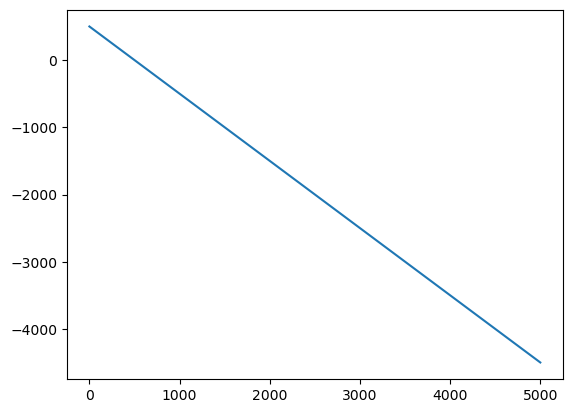

In [5]:
# import required libraries
import numpy as np
import matplotlib.pyplot as plt

# create a numpy vector of size 5000 with value 0
cash_balance = np.zeros(5000)

cash_balance[0] = 500

# generate random numbers using Binomial
samples = np.random.binomial(9, 0.5, size=len(cash_balance))

# update the cash balance
for i in range(1, len(cash_balance)):
    if sample[i] < 5:
        cash_balance[i] = cash_balance[i - 1] - 1
    else:
        cash_balance[i] = cash_balance[i - 1]+ 1
        
# plot the updated cash balance
plt.plot(np.arange(len(cash_balance)), cash_balance)
plt.show()


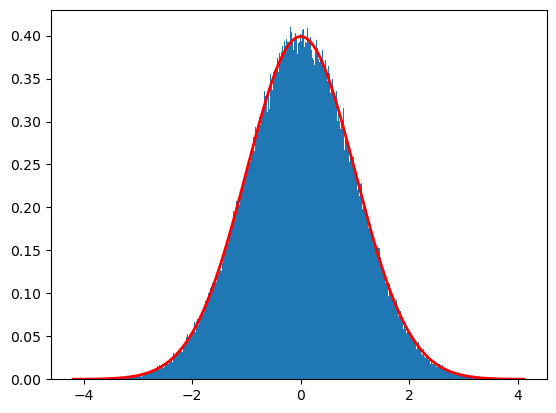

In [4]:
# Import required library
import numpy as np
import matplotlib.pyplot as plt

sample_size = 225000

# Generate random values sample using normal distribution
sample = np.random.normal(size=sample_size)

# Create Histogram
n, bins, patch_list = plt.hist(sample, int(np.sqrt(sample_size)), density=True)

# Set parameters
mu, sigma=0,1

x= bins
y= 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2))

# Plot line plt (or bell curve)
plt.plot(x,y,color='red', lw=2)
plt.show()

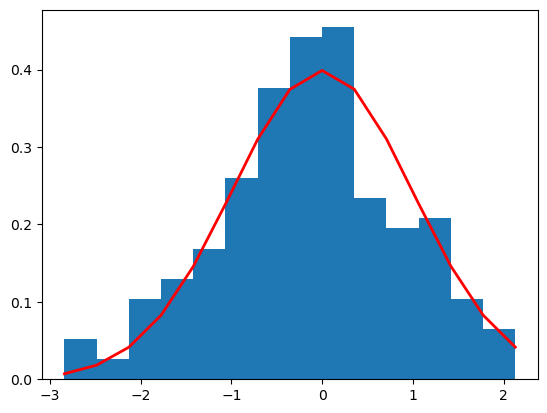

In [285]:
# Import required library
import numpy as np
import matplotlib.pyplot as plt

sample_size = 217

# Generate random values sample using normal distribution
sample = np.random.normal(size=sample_size)

# Create Histogram
n, bins, patch_list = plt.hist(sample, int(np.sqrt(sample_size)), density=True)

# Set parameters
mu, sigma=0,1

x= bins
y= 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2))

# Plot line plt (or bell curve)
plt.plot(x,y,color='red', lw=2)
plt.show()

/var/folders/y2/k1jd61017cq_08jjkm01yw7m0000gn/T/ipykernel_43001/3748404265.py:5: DeprecationWarning: scipy.misc.face has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.face instead.
  face_image = face()


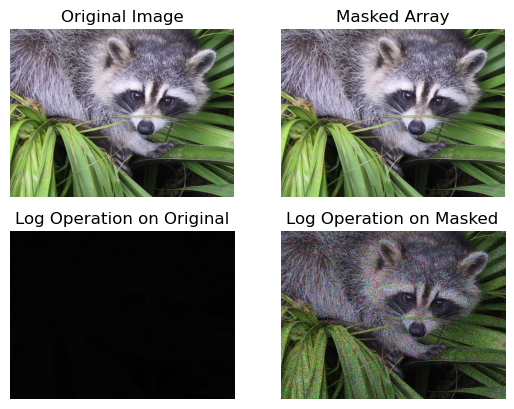

In [286]:
   # Import required library
   import numpy as np
   from scipy.misc import face
   import matplotlib.pyplot as plt
   face_image = face()
   mask_random_array = np.random.randint(0, 3, size=face_image.shape)
   fig, ax = plt.subplots(nrows=2, ncols=2)
    
   # Display the Original Image
   plt.subplot(2,2,1)
   plt.imshow(face_image)
   plt.title("Original Image")
   plt.axis('off')

   # Display masked array
   masked_array = np.ma.array(face_image, mask=mask_random_array)
   plt.subplot(2,2,2)
   plt.title("Masked Array")
   plt.imshow(masked_array)
   plt.axis('off')

   # Log operation on original image
   plt.subplot(2,2,3)
   plt.title("Log Operation on Original")
   plt.imshow(np.ma.log(face_image).astype('uint8'))
   plt.axis('off')
  
   # Log operation on masked array
   plt.subplot(2,2,4)
   plt.title("Log Operation on Masked")
   plt.imshow(np.ma.log(masked_array).astype('uint8'))
   plt.axis('off')
   
   # Display the subplots
   plt.show()
     

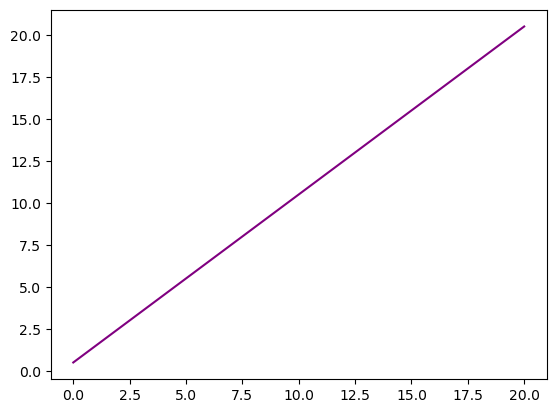

In [290]:
   # Add the essential library matplotlib
   import matplotlib.pyplot as plt
   import numpy as np
   
   # create the data
   a = np.linspace(0, 20)
   
   # Draw the plot
   plt.plot(a, a + 0.5, label='linear', color = 'purple')

   # Display the chart
   plt.show()

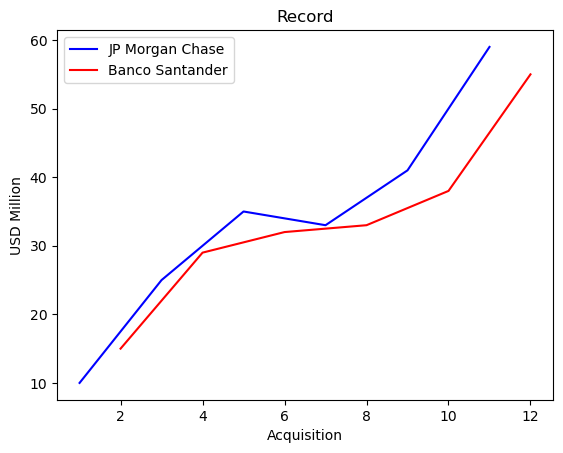

In [296]:
# Add the required libraries
import matplotlib.pyplot as plt
   
# Create the data
x = [1,3,5,7,9,11]
y = [10,25,35,33,41,59]

# Let's plot the data
plt.plot(x, y,label='JP Morgan Chase', color='blue')
   
# Create the data
x = [2,4,6,8,10,12]
y = [15,29,32,33,38,55]
   
# Plot the data
plt.plot(x, y, label='Banco Santander', color='red')
   
# Add X Label on X-axis
plt.xlabel("Acquisition")
   
# Add X Label on X-axis
plt.ylabel("USD Million")
   
# Append the title to graph
plt.title("Record")
   
# Add legend to graph
plt.legend()
   
# Display the plot
plt.show()

In [357]:
exam_dict = {'San':[95, 92, 92, 97], 'Sak':[98, 96, 97, 97], 'Sok':[98, 98, 96, 98]}
exam = pd.DataFrame(exam_dict, index=['Maths', 'English', 'IT', 'Physics'])
exam

,San,Sak,Sok
Maths,95,98,98
English,92,96,98
IT,92,97,96
Physics,97,97,98


In [374]:
x=(95, 92, 92, 97)
sum(x)

TypeError: 'list' object is not callable

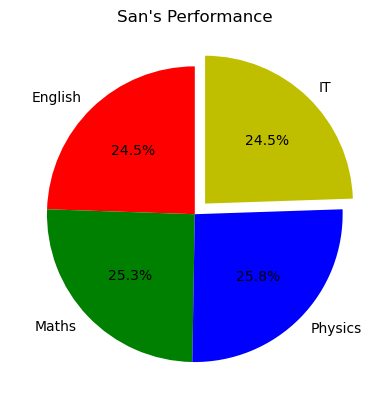

In [302]:
# Add the essential library matplotlib
import matplotlib.pyplot as plt

# create the data
subjects = ["English", "Maths", "Physics", "IT"]
scores = [92, 95, 97, 92]

# Plot the pie plot
plt.pie(scores, labels=subjects, colors=['r', 'g', 'b', 'y']
       , startangle=90, shadow=False, explode=(0, 0, 0, 0.1), autopct='%1.1f%%')

# Add title to graph
plt.title("San's Performance")

# Draw the chart
plt.show()

In [6]:
# Add the essential library matplotlib
import matplotlib.pyplot as plt

# create the data
subjects = ["San", "Sak", "Sok"]
scores = {'San':[sum(92, 95, 97, 92)/4], 'Sak':[sum(96, 98, 97, 97)/4], 'Sok':[sum(98, 98, 98, 96)/4]}

# Plot the pie plot
plt.pie(scores, labels=subjects, colors=['r', 'g', 'b']
       , startangle=90, shadow=False, explode=(0, 0, 0.1), autopct='%1.1f%%')

# Add title to graph
plt.title("Student Performance")

# Draw the chart
plt.show()

TypeError: sum() takes at most 2 arguments (4 given)

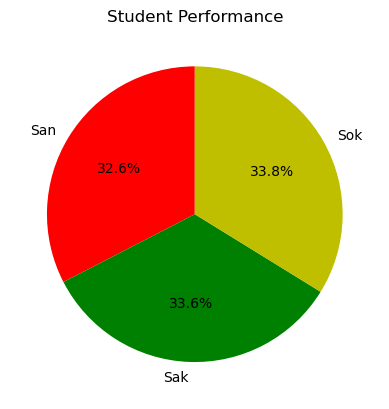

In [319]:
# Add the essential library matplotlib
import matplotlib.pyplot as plt

# create the data
subjects = ["San", "Sak", "Sok"]
scores = [(92+95+97+92)/4, (96+98+97+97)/4, (98+98+98+96)/4]

# Plot the pie plot
plt.pie(scores, labels=subjects, colors=['r', 'g', 'y']
       , startangle=90, shadow=False, explode=(0, 0, 0), autopct='%1.1f%%')

# Add title to graph
plt.title("Student Performance")

# Draw the chart
plt.show()

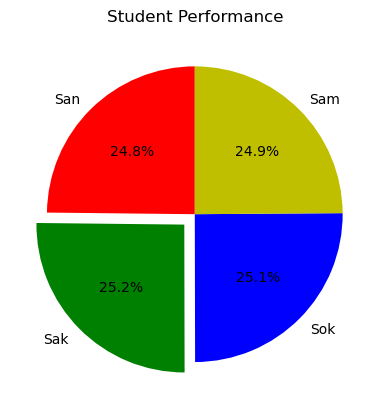

In [321]:
# Add the essential library matplotlib
import matplotlib.pyplot as plt

# create the data
subjects = ["San", "Sak", "Sok", "Sam"]
scores = [389, 395, 393, 390]

# Plot the pie plot
plt.pie(scores, labels=subjects, colors=['r', 'g', 'b', 'y']
        , startangle=90, shadow=False, explode=(0, 0.1, 0, 0), autopct='%1.1f%%')

# Add title to graph
plt.title("Student Performance")

# Draw the chart
plt.show()

In [7]:
# Add the essential library matplotlib
import matplotlib.pyplot as plt

# create the data
subjects = ["San", "Sak", "Sok"]
scores = [sum(92, 95, 97, 92)/4, sum(96, 98, 97, 97)/4, sum(98, 98, 98, 96)/4]

# Plot the pie plot
plt.pie(scores, labels=subjects, colors=['r', 'g', 'b']
       , startangle=90, shadow=False, explode=(0, 0, 0.1), autopct='%1.1f%%')

# Add title to graph
plt.title("Student Performance")

# Draw the chart
plt.show()

TypeError: sum() takes at most 2 arguments (4 given)

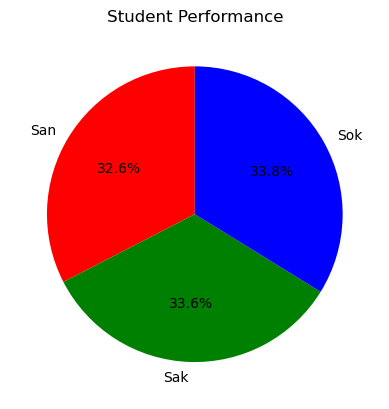

In [8]:
# Add the essential library matplotlib
import matplotlib.pyplot as plt

# Create info
x = (92, 95, 97, 92)
y = (96, 98, 97, 97)
z = (98, 98, 98, 96)

# create the data
subjects = ["San", "Sak", "Sok"]

scores = [sum(x), sum(y), sum(z)]

# Plot the pie plot
plt.pie(scores, labels=subjects, colors=['r', 'g', 'b']
        , startangle=90, shadow=False, explode=(0, 0, 0), autopct='%1.1f%%')

# Add title to graph
plt.title("Student Performance")

# Draw the chart
plt.show()

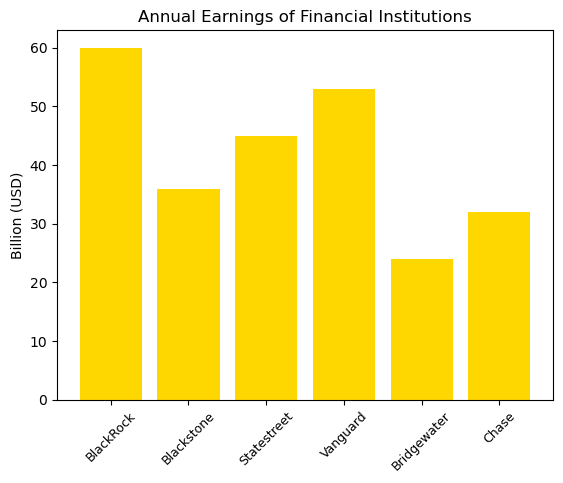

In [396]:
# Add the essential library matplot
import matplotlib.pyplot as plt

# Create the data
commercial_earnings = ['BlackRock', 'Blackstone', 'Statestreet', 'Vanguard', 'Bridgewater', 'Chase']
plt.xticks(rotation=45, size=9)
earning_counts = [60, 36, 45, 53, 24, 32]

# Plot the data
plt.bar(commercial_earnings, earning_counts, color='Gold')

# Add X label on X-axis
plt.xlabel("")

# Add Y lable on Y-axis
plt.ylabel("Billion (USD)")

# Add title to graph
plt.title("Annual Earnings of Financial Institutions")

# Show the plot
plt.show()


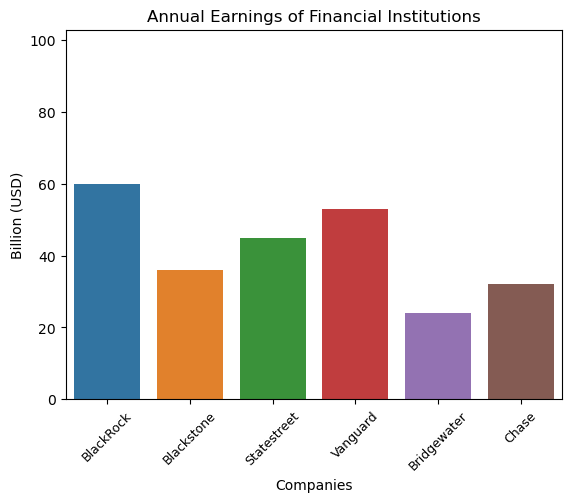

In [434]:
# Import the required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create DataFrame
df=pd.DataFrame({'x':['BlackRock','Blackstone','Statestreet','Vanguard','Bridgewater','Chase']
                 ,'y':[60,36,45,53,24,32]})
plt.xticks(rotation=45, size=9)

# Create lmplot
sns.barplot(x='x', y='y', data=df)

# Add X label on X-axis
plt.xlabel("Companies")

# Add Y label on Y-axis
plt.ylabel("Billion (USD)")

# Add title to plot
plt.title("Annual Earnings of Financial Institutions")

# Show figure
plt.show()

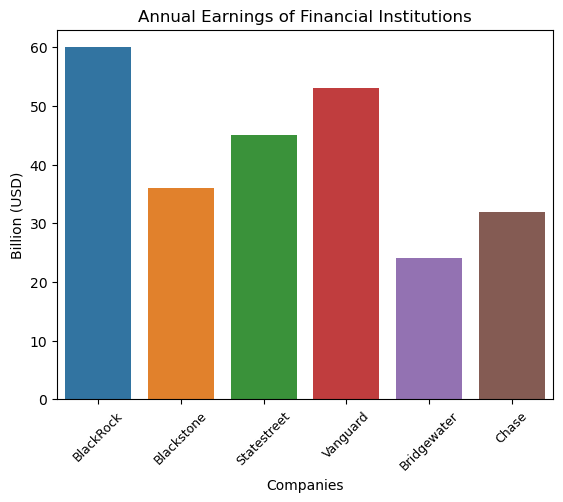

In [499]:
# Import the required libraries
import pandas as pd
import matplotlib.pyplot as plt

# Create DataFrame
df=pd.DataFrame({'x':['BlackRock','Blackstone','Statestreet','Vanguard','Bridgewater','Chase']
                 ,'y':[60,36,45,53,24,32]})
plt.xticks(rotation=45, size=9)

# Create lmplot
sns.barplot(x='x', y='y', data=df)

# Add X label on X-axis
plt.xlabel("Companies")

# Add Y label on Y-axis
plt.ylabel("Billion (USD)")

# Add title to plot
plt.title("Annual Earnings of Financial Institutions")

# Show figure
plt.show()

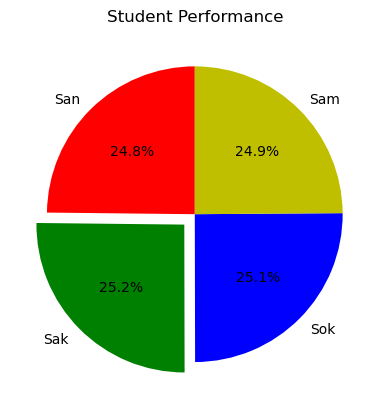

In [441]:
# Add the essential library matplotlib
import matplotlib.pyplot as plt

# create the data
subjects = ["San", "Sak", "Sok", "Sam"]
scores = [389, 395, 393, 390]

# Plot the pie plot
plt.pie(scores, labels=subjects, colors=['r', 'g', 'b', 'y']
        , startangle=90, shadow=False, explode=(0, 0.1, 0, 0), autopct='%1.1f%%')

# Add title to graph
plt.title("Student Performance")

# Draw the chart
plt.show()

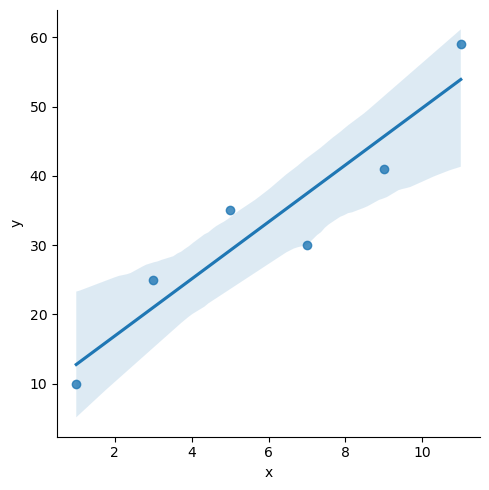

In [407]:
# Import the required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create DataFrame
df=pd.DataFrame({'x':[1,3,5,7,9,11],'y':[10,25,35,30,41,59]})

# Create lmplot
sns.lmplot(x='x', y='y', data=df)

# Show figure
plt.show()

<h2> Pandas. Python for Ultimate Beginners.Step by Step. p139

In [ ]:
# importing all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [447]:
# let us create our dictionary
d = {'A':np.random.rand(5),'B':np.random.rand(5), 'C':np.random.rand(5), 'D':np.random.rand(5)}

# now creating a data frame
df = pd.DataFrame(d)
df

,A,B,C,D
0,0.674882,0.892046,0.579527,0.767261
1,0.782425,0.798909,0.945428,0.825385
2,0.852659,0.474398,0.991269,0.287870
3,0.732368,0.216005,0.258636,0.731990
4,0.365429,0.384707,0.890319,0.633228


array([[<Axes: title={'center': 'B'}>]], dtype=object)

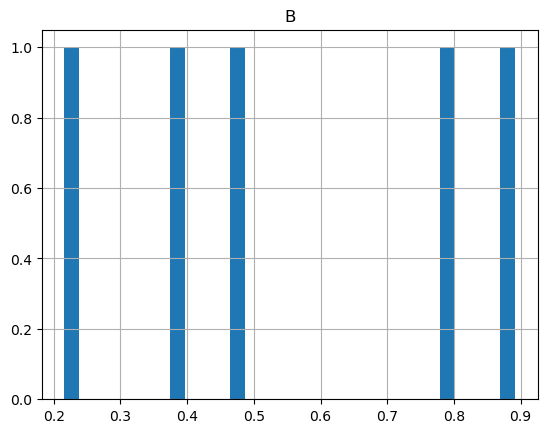

In [455]:
df[['B']].hist(bins=30)

<Axes: >

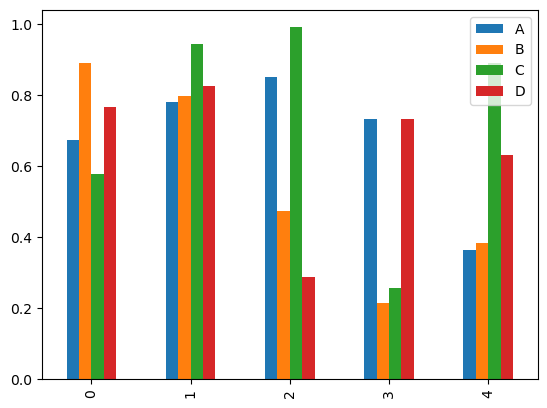

In [449]:
df.plot.bar()

<Axes: >

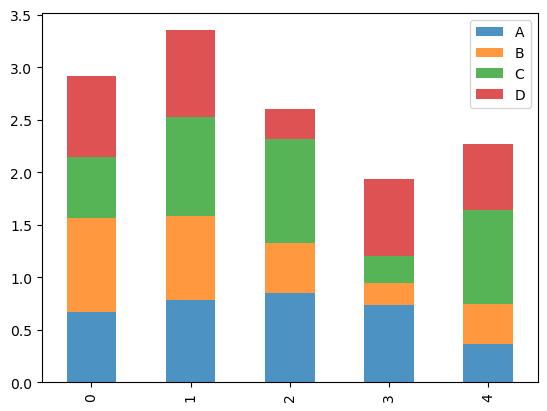

In [450]:
df.plot.bar(stacked = True, alpha = 0.8)

<Axes: >

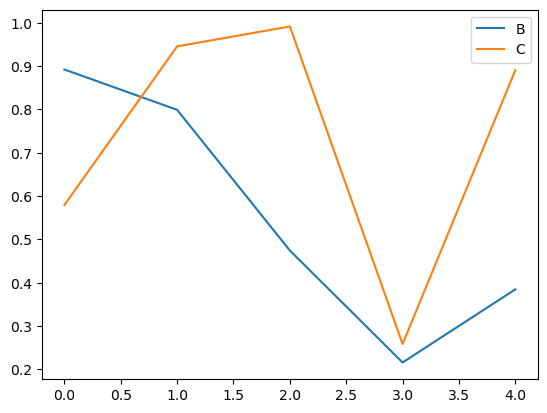

In [451]:
df.plot.line(y =['B','C'])

In [457]:
exam_dict = {'Math':[95, 98, 98], 'English':[92, 96, 98], 'Physics':[97, 97, 98], 'IT':[92, 97, 96]}
exam = pd.DataFrame(exam_dict, index=['San', 'Sak', 'Sok'])
exam

,Math,English,Physics,IT
San,95,92,97,92
Sak,98,96,97,97
Sok,98,98,98,96


(array([0, 1, 2]), [Text(0, 0, 'San'), Text(1, 0, 'Sak'), Text(2, 0, 'Sok')])

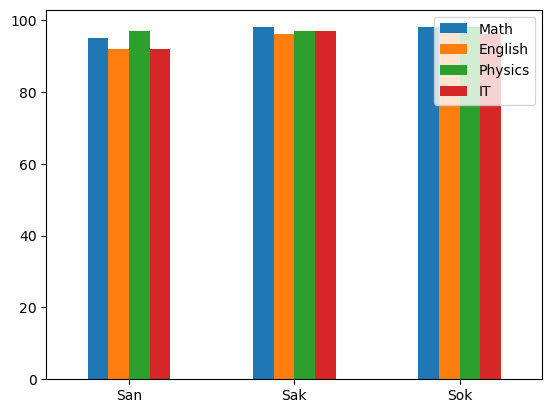

In [463]:
exam.plot.bar()
plt.xticks(rotation=0)

In [483]:
ae=pd.DataFrame({'Annual Earnings':[60,36,45,53,24,32]}, 
                index=['BlackRock','Blackstone','Statestreet','Vanguard','Bridgewater','Chase'])
ae

,Annual Earnings
BlackRock,60
Blackstone,36
Statestreet,45
Vanguard,53
Bridgewater,24
Chase,32


In [497]:
ae.drop(index=['Bridgewater'])

,Annual Earnings
BlackRock,60
Blackstone,36
Statestreet,45
Vanguard,53
Chase,32


<Axes: >

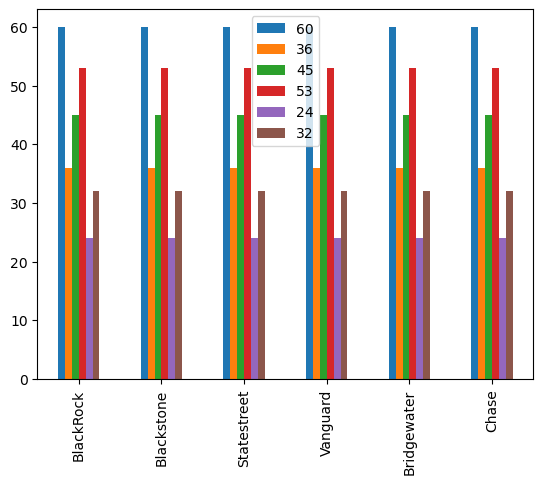

In [531]:
ae.plot.bar()

<Axes: >

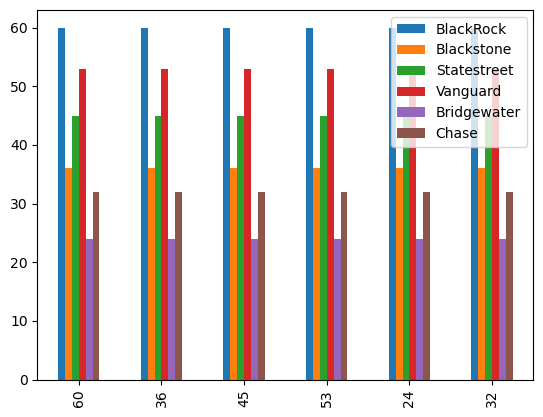

In [533]:
annual_earnings={'BlackRock':60, 'Blackstone':36, 'Statestreet':45, 'Vanguard':53, 'Bridgewater':24, 'Chase':32}
financial_institutions=[60, 36, 45, 53, 24, 32]
ae1=pd.DataFrame(annual_earnings, index=financial_institutions)
ae1.plot.bar()

In [18]:
import pandas as pd

record = {'Application Name':['Python', 'R', 'SQL', 'Tableau', 'Excel'], 'Preference':[5,4,3,5,5], 
            'Field':['Business Analytics', 'Data Science', 'Operation Management', 'Data Analysis', 'Financial Manageement'],
           'Function':['code', 'code', 'code', 'code', 'plain']}
index = [1,2,3,4,5]
data = pd.DataFrame(record,index=index)
data

,Application Name,Preference,Field,Function
1,Python,5,Business Analytics,code
2,R,4,Data Science,code
3,SQL,3,Operation Management,code
4,Tableau,5,Data Analysis,code
5,Excel,5,Financial Manageement,plain
